In [1]:
# install.packages("caret")
# install.packages("ROSE")
# install.packages("randomForest")
# install.packages("xgboost")
# install.packages("caTools")

In [5]:
library(dplyr)       
library(caret)
library(ROSE)
library(randomForest)
library(xgboost)
library(caTools)

#### Load the Dataset

In [6]:
df <- read.csv('secondary_data.csv')
df

S,cap.diameter,cap.shape,cap.surface,cap.color,does.bruise.or.bleed,gill.attachment,gill.spacing,gill.color,stem.height,⋯,stem.root,stem.surface,stem.color,veil.type,veil.color,has.ring,ring.type,spore.print.color,habitat,season
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
p,15.26,x,g,o,f,e,,w,16.95,⋯,s,y,w,u,w,t,g,,d,w
p,16.60,x,g,o,f,e,,w,17.99,⋯,s,y,w,u,w,t,g,,d,u
p,14.07,x,g,o,f,e,,w,17.80,⋯,s,y,w,u,w,t,g,,d,w
p,14.17,f,h,e,f,e,,w,15.77,⋯,s,y,w,u,w,t,p,,d,w
p,14.64,x,h,o,f,e,,w,16.53,⋯,s,y,w,u,w,t,p,,d,w
p,15.34,x,g,o,f,e,,w,17.84,⋯,s,y,w,u,w,t,p,,d,u
p,14.85,f,h,o,f,e,,w,17.71,⋯,s,y,w,u,w,t,g,,d,w
p,14.86,x,h,e,f,e,,w,17.03,⋯,s,y,w,u,w,t,p,,d,u
p,12.85,f,g,o,f,e,,w,17.27,⋯,s,y,w,u,w,t,p,,d,a


In [7]:
summary(df)

      S              cap.diameter     cap.shape         cap.surface       
 Length:61069       Min.   : 0.380   Length:61069       Length:61069      
 Class :character   1st Qu.: 3.480   Class :character   Class :character  
 Mode  :character   Median : 5.860   Mode  :character   Mode  :character  
                    Mean   : 6.734                                        
                    3rd Qu.: 8.540                                        
                    Max.   :62.340                                        
  cap.color         does.bruise.or.bleed gill.attachment    gill.spacing      
 Length:61069       Length:61069         Length:61069       Length:61069      
 Class :character   Class :character     Class :character   Class :character  
 Mode  :character   Mode  :character     Mode  :character   Mode  :character  
                                                                              
                                                                              
 

In [8]:
str(df)

'data.frame':	61069 obs. of  21 variables:
 $ S                   : chr  "p" "p" "p" "p" ...
 $ cap.diameter        : num  15.3 16.6 14.1 14.2 14.6 ...
 $ cap.shape           : chr  "x" "x" "x" "f" ...
 $ cap.surface         : chr  "g" "g" "g" "h" ...
 $ cap.color           : chr  "o" "o" "o" "e" ...
 $ does.bruise.or.bleed: chr  "f" "f" "f" "f" ...
 $ gill.attachment     : chr  "e" "e" "e" "e" ...
 $ gill.spacing        : chr  "" "" "" "" ...
 $ gill.color          : chr  "w" "w" "w" "w" ...
 $ stem.height         : num  16.9 18 17.8 15.8 16.5 ...
 $ stem.width          : num  17.1 18.2 17.7 16 17.2 ...
 $ stem.root           : chr  "s" "s" "s" "s" ...
 $ stem.surface        : chr  "y" "y" "y" "y" ...
 $ stem.color          : chr  "w" "w" "w" "w" ...
 $ veil.type           : chr  "u" "u" "u" "u" ...
 $ veil.color          : chr  "w" "w" "w" "w" ...
 $ has.ring            : chr  "t" "t" "t" "t" ...
 $ ring.type           : chr  "g" "g" "g" "p" ...
 $ spore.print.color   : chr  "" "" ""

In [9]:
dim(df)

[1] 61069    21

In [10]:
rows_of_df <- nrow(df)
rows_of_df

[1] 61069

In [11]:
cols_of_df <- ncol(df)
cols_of_df

[1] 21

In [12]:
## 21 independent and 1 dependent variable

In [13]:
# Convert character columns to factor
df <- df %>%
  mutate_if(is.character, as.factor)

In [14]:
sum(is.na(df))

[1] 0

#### Remove irrelevant variables:

In [15]:
df <- df[, sapply(df, function(x) {
  if (is.factor(x)) {
    return(TRUE)  # Exclude factor variables
  } else {
    return(var(x) > 0)  # Calculate variance for non-factor variables
  }
})]

In [16]:
d<-dim(df)

In [17]:
# Print the number and proportion of irrelevant predictive/independent variables removed
rmvd <- cols_of_df - d[2]
prop <- rmvd / cols_of_df
print(paste("Number of Irrelevant Predictive/Independent Variables Removed:", rmvd))
print(paste("Proportion of Irrelevant Predictive/Independent Variables Removed:", prop))

[1] "Number of Irrelevant Predictive/Independent Variables Removed: 0"
[1] "Proportion of Irrelevant Predictive/Independent Variables Removed: 0"


#### Identify and remove out outliers:

In [18]:
str(df)

'data.frame':	61069 obs. of  21 variables:
 $ S                   : Factor w/ 2 levels "e","p": 2 2 2 2 2 2 2 2 2 2 ...
 $ cap.diameter        : num  15.3 16.6 14.1 14.2 14.6 ...
 $ cap.shape           : Factor w/ 7 levels "b","c","f","o",..: 7 7 7 3 7 7 3 7 3 3 ...
 $ cap.surface         : Factor w/ 12 levels "","d","e","g",..: 4 4 4 5 5 4 5 5 4 4 ...
 $ cap.color           : Factor w/ 12 levels "b","e","g","k",..: 7 7 7 2 7 7 7 2 7 2 ...
 $ does.bruise.or.bleed: Factor w/ 2 levels "f","t": 1 1 1 1 1 1 1 1 1 1 ...
 $ gill.attachment     : Factor w/ 8 levels "","a","d","e",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ gill.spacing        : Factor w/ 4 levels "","c","d","f": 1 1 1 1 1 1 1 1 1 1 ...
 $ gill.color          : Factor w/ 12 levels "b","e","f","g",..: 11 11 11 11 11 11 11 11 11 11 ...
 $ stem.height         : num  16.9 18 17.8 15.8 16.5 ...
 $ stem.width          : num  17.1 18.2 17.7 16 17.2 ...
 $ stem.root           : Factor w/ 6 levels "","b","c","f",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ stem.

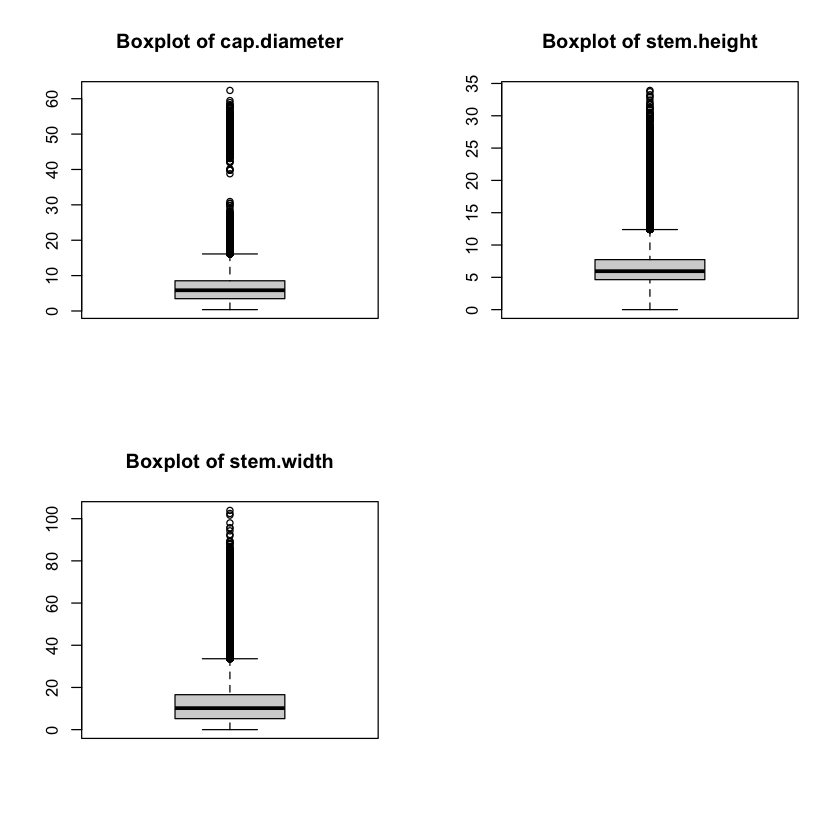

In [19]:
par(mfrow=c(2,2))

columns_to_plot <- c('cap.diameter','stem.height','stem.width')

for (col in columns_to_plot) {
  boxplot(df[[col]], main = paste("Boxplot of", col))
}

In [20]:
winso <- function(x) {
  Q1 <- quantile(x, 0.25)
  Q3 <- quantile(x, 0.75)
  IQR <- Q3 - Q1
  lower_threshold <- Q1 - 1.5 * IQR
  upper_threshold <- Q3 + 1.5 * IQR
  outliers <- x < lower_threshold | x > upper_threshold
  return(outliers)
}

In [21]:
# assign numerical variables to nuim_vars
num_vars <- sapply(df, is.numeric)

# identify outliers i the dataframe
outlier <- sapply(df[, num_vars], winso)

# sum of outliers
total <- sum(rowSums(outlier))
total

[1] 7536

In [22]:
new_df <- as.data.frame(lapply(df[, num_vars], winso))

In [23]:
# Count the number of outliers filtered
fltrd <- sum(new_df != df[, num_vars])

In [24]:
# Calculate the proportion of outliers filtered
prop <- fltrd / (nrow(df) * length(num_vars))

In [25]:
# Output the results
cat("Number of outliers filtered:", fltrd, "\n")
cat("Proportion of outliers filtered:", prop, "\n")

Number of outliers filtered: 181089 
Proportion of outliers filtered: 0.1412056 


#### Romove duplicates

In [26]:
dimention <- dim(new_df)

In [27]:
new_df <- unique(df)

In [28]:
dimention_after <- dim(new_df)

In [29]:
removed <- dimention - dimention_after[1]
prop <- removed / dimention
print(paste("Number of Duplicate Records Removed:", removed))
print(paste("Proportion of Duplicate Records Removed:", prop))

[1] "Number of Duplicate Records Removed: 146"   
[2] "Number of Duplicate Records Removed: -60920"
[1] "Proportion of Duplicate Records Removed: 0.00239073834515057"
[2] "Proportion of Duplicate Records Removed: -20306.6666666667"  


#### Dimensionality reduction based on PCA

In [30]:
# numeric variables
num_cols <- sapply(new_df, is.numeric)

In [31]:
# PCA 
pca <- prcomp(new_df[, num_cols], scale. = TRUE)

In [32]:
# Summary of PCA results
summary(pca)

Importance of components:
                          PC1    PC2    PC3
Standard deviation     1.4300 0.8065 0.5521
Proportion of Variance 0.6816 0.2168 0.1016
Cumulative Proportion  0.6816 0.8984 1.0000

In [33]:
# Extract the principal components
principal_components <- pca$x

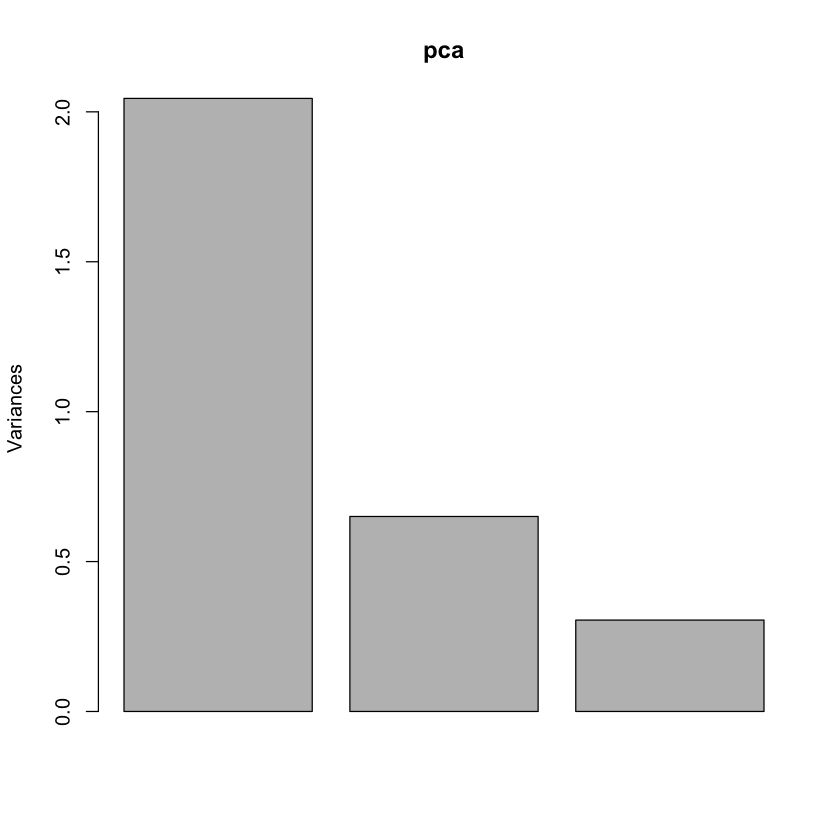

In [34]:
# Optional: Scree plot
plot(pca)

In [35]:
# Assuming 'pca_result' contains the PCA-transformed features and 'new_df' is the original dataset
df_new <- cbind(new_df, principal_components)

#### Correlation matrix

In [36]:
# convert factor to numeric
factor_columns <- sapply(df_new, is.factor)
df_new[factor_columns] <- lapply(df_new[factor_columns], as.numeric)

# correlation matrix
cormat <- round(cor(df_new), 2)

In [37]:
get_upper_tri <- function(cormat)
    
{   
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
}

In [38]:
upper_tri <- get_upper_tri(cormat)

In [39]:
# Melt the correlation matrix
library(reshape2)
cor_melt <- melt(upper_tri, na.rm = TRUE)

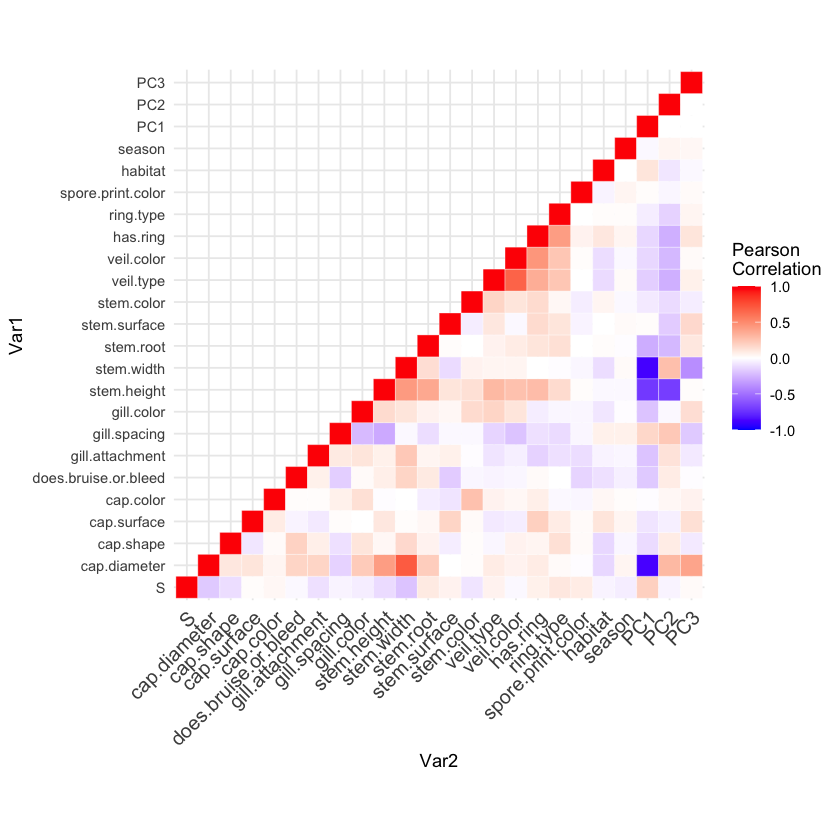

In [40]:
# Heatmap
library(ggplot2)

ggplot(data = cor_melt, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

#### Normalise the data

In [41]:
# Normalize numerical variables using Min-Max scaling

df_new[, sapply(df_new, is.numeric)] <- 
                apply(df_new[, sapply(df_new, is.numeric)], 
                2, function(x) (x - min(x)) / (max(x) - min(x)))

In [42]:
print("Min-Max Scaled Data:")
print(head(df_new))

[1] "Min-Max Scaled Data:"
  S cap.diameter cap.shape cap.surface  cap.color does.bruise.or.bleed
1 1    0.2401549 1.0000000   0.2727273 0.54545455                    0
2 1    0.2617818 1.0000000   0.2727273 0.54545455                    0
3 1    0.2209490 1.0000000   0.2727273 0.54545455                    0
4 1    0.2225629 0.3333333   0.3636364 0.09090909                    0
5 1    0.2301485 1.0000000   0.3636364 0.54545455                    0
6 1    0.2414461 1.0000000   0.2727273 0.54545455                    0
  gill.attachment gill.spacing gill.color stem.height stem.width stem.root
1       0.4285714            0  0.9090909   0.4997052  0.1644693         1
2       0.4285714            0  0.9090909   0.5303656  0.1750553         1
3       0.4285714            0  0.9090909   0.5247642  0.1707247         1
4       0.4285714            0  0.9090909   0.4649175  0.1537869         1
5       0.4285714            0  0.9090909   0.4873231  0.1655279         1
6       0.4285714         

#### Balance the data

In [43]:
df_new <- ovun.sample(S ~ ., data = df_new, method = "both", N = nrow(df), seed = 123)$data

In [44]:
write.csv(df_new, file = "Mushroom_r_preprocessed.csv", row.names = FALSE) 

In [46]:
dim(df_new)
str(df_new)

[1] 61069    24

'data.frame':	61069 obs. of  24 variables:
 $ S                   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ cap.diameter        : num  0.2318 0.1624 0.0975 0.1637 0.1104 ...
 $ cap.shape           : num  1 0.5 1 1 1 ...
 $ cap.surface         : num  0.364 0 0 0.182 0.182 ...
 $ cap.color           : num  0.455 0.455 1 0.455 0.455 ...
 $ does.bruise.or.bleed: num  1 0 0 1 0 0 0 1 0 0 ...
 $ gill.attachment     : num  0.714 0.571 0.857 0.714 0.143 ...
 $ gill.spacing        : num  0 1 0.667 0 0 ...
 $ gill.color          : num  0.0909 0.1818 1 0.5455 0.4545 ...
 $ stem.height         : num  0.256 0.135 0.157 0.226 0.292 ...
 $ stem.width          : num  0.308 0.249 0.123 0.258 0.138 ...
 $ stem.root           : num  0.4 0 0 0 1 0 0 1 0 0 ...
 $ stem.surface        : num  0 0.25 0.5 0 0 0 0 0 0 1 ...
 $ stem.color          : num  1 0.5 1 0.833 0.5 ...
 $ veil.type           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ veil.color          : num  0 0 0 0 0.167 ...
 $ has.ring            : num  0 0 0 0 0 0 0 1

#### Modelling 

#### Train Test Split

In [45]:
class_distribution <- table(new_df$S)
print("Class Distribution:")
print(class_distribution)

[1] "Class Distribution:"

    e     p 
27181 33742 


In [43]:
# Train test Split
set.seed(123)  
trainIndex <- createDataPartition(df_new[["S"]], p = 0.7, list = FALSE)
train_data <- df_new[trainIndex, , drop = FALSE] 
test_data <- df_new[-trainIndex, , drop = FALSE]  


In [44]:
train_class_distribution <- table(train_data$S)
test_class_distribution <- table(test_data$S)

print("Train Class Distribution:")
print(train_class_distribution)
print("Test Class Distribution:")
print(test_class_distribution)

[1] "Train Class Distribution:"

    0     1 
21178 21571 
[1] "Test Class Distribution:"

   0    1 
9070 9250 


In [45]:
class(train_data$S)
class(test_data$S)

[1] "numeric"

[1] "numeric"

In [46]:
train_data$S <- as.factor(train_data$S)
test_data$S <- as.factor(test_data$S)

#### Random Forest

In [47]:
rf <- randomForest(
  S ~ ., 
  data = train_data,
  ntree = 1000
)


In [65]:
summary(rf)

                Length Class  Mode     
call                4  -none- call     
type                1  -none- character
predicted       42749  factor numeric  
err.rate         3000  -none- numeric  
confusion           6  -none- numeric  
votes           85498  matrix numeric  
oob.times       42749  -none- numeric  
classes             2  -none- character
importance         23  -none- numeric  
importanceSD        0  -none- NULL     
localImportance     0  -none- NULL     
proximity           0  -none- NULL     
ntree               1  -none- numeric  
mtry                1  -none- numeric  
forest             14  -none- list     
y               42749  factor numeric  
test                0  -none- NULL     
inbag               0  -none- NULL     
terms               3  terms  call     

In [48]:
# Make predictions on test data
pred_test <- predict(rf, newdata = test_data, type= "class")

In [49]:
confusionMatrix(table(pred_test,test_data$S)) 

Confusion Matrix and Statistics

         
pred_test    0    1
        0 9069    1
        1    1 9249
                                     
               Accuracy : 0.9999     
                 95% CI : (0.9996, 1)
    No Information Rate : 0.5049     
    P-Value [Acc > NIR] : <2e-16     
                                     
                  Kappa : 0.9998     
                                     
 Mcnemar's Test P-Value : 1          
                                     
            Sensitivity : 0.9999     
            Specificity : 0.9999     
         Pos Pred Value : 0.9999     
         Neg Pred Value : 0.9999     
             Prevalence : 0.4951     
         Detection Rate : 0.4950     
   Detection Prevalence : 0.4951     
      Balanced Accuracy : 0.9999     
                                     
       'Positive' Class : 0          
                                     

In [69]:
precision_0 <- 9069 / (9069 + 1)
recall_0 <- 9069 / (9069 + 1)
precision_1 <- 9249 / (9249 + 1)
recall_1 <- 9249 / (9249 + 1)

f1_0 <- 2 * (precision_0 * recall_0) / (precision_0 + recall_0)

f1_1 <- 2 * (precision_1 * recall_1) / (precision_1 + recall_1)

cat("F1 Score class 0:", f1_0, "\n")
cat("F1 Score class 1:", f1_1, "\n")

F1 Score class 0: 0.9998897 
F1 Score class 1: 0.9998919 


#### Gradient Boosting

In [50]:
# Set seed for reproducibility
set.seed(123)

In [51]:
# Split the data into training and testing sets
split <- sample.split(df_new, SplitRatio = 0.8) 

In [52]:
# Create the training set
train_data <- subset(df_new, split == TRUE)

In [53]:
# Create the testing set
test_data <- subset(df_new, split == FALSE)

In [54]:
# Perform one-hot encoding on factor variables
train_data_encoded <- model.matrix(~ . - 1, data = train_data[, -which(names(train_data) == "S")])
test_data_encoded <- model.matrix(~ . - 1, data = test_data[, -which(names(test_data) == "S")])

In [55]:
# Encode the target variable as a factor
train_data$S <- as.factor(train_data$S)

In [56]:
# Convert factor levels to numeric (0 and 1)
train_data$S <- as.numeric(train_data$S) - 1

In [57]:
# Train the XGBoost model
xgb <- xgboost(
  data = train_data_encoded,
  label = train_data$S,
  nrounds = 100,
  objective = "binary:logistic")

[1]	train-logloss:0.577706 
[2]	train-logloss:0.507415 
[3]	train-logloss:0.452474 
[4]	train-logloss:0.403706 
[5]	train-logloss:0.337202 
[6]	train-logloss:0.304761 
[7]	train-logloss:0.285157 
[8]	train-logloss:0.241040 
[9]	train-logloss:0.227769 
[10]	train-logloss:0.208772 
[11]	train-logloss:0.174708 
[12]	train-logloss:0.158661 
[13]	train-logloss:0.142716 
[14]	train-logloss:0.133445 
[15]	train-logloss:0.120286 
[16]	train-logloss:0.111374 
[17]	train-logloss:0.102018 
[18]	train-logloss:0.094190 
[19]	train-logloss:0.087090 
[20]	train-logloss:0.082085 
[21]	train-logloss:0.076925 
[22]	train-logloss:0.068989 
[23]	train-logloss:0.061366 
[24]	train-logloss:0.057543 
[25]	train-logloss:0.052723 
[26]	train-logloss:0.050940 
[27]	train-logloss:0.045653 
[28]	train-logloss:0.042500 
[29]	train-logloss:0.040271 
[30]	train-logloss:0.037208 
[31]	train-logloss:0.033836 
[32]	train-logloss:0.032168 
[33]	train-logloss:0.030346 
[34]	train-logloss:0.028382 
[35]	train-logloss:0.02

In [58]:
summary(xgb)

               Length Class              Mode       
handle              1 xgb.Booster.handle externalptr
raw            251994 -none-             raw        
niter               1 -none-             numeric    
evaluation_log      2 data.table         list       
call               14 -none-             call       
params              2 -none-             list       
callbacks           2 -none-             list       
feature_names      23 -none-             character  
nfeatures           1 -none-             numeric    

In [59]:
print(xgb)

##### xgb.Booster
raw: 246.1 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, objective = "binary:logistic")
params (as set within xgb.train):
  objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 23 
niter: 100
nfeatures : 23 
evaluation_log:
     iter train_logloss
    <num>         <num>
        1   0.577705952
        2   0.507414540
---                    
       99   0.001073971
      100   0.001061344


In [60]:
pred <- predict(xgb, test_data_encoded)

In [61]:
pred_binary <- ifelse(pred > 0.5, 1, 0)

In [62]:
conf_mat <- table(Actual = test_data$S, Predicted = pred_binary)

In [63]:
accuracy <- sum(diag(conf_mat)) / sum(conf_mat)

In [64]:
print("Confusion Matrix:")
print(conf_mat)
print(paste("Accuracy:", accuracy))

[1] "Confusion Matrix:"
      Predicted
Actual    0    1
     0 6299    2
     1    0 6421
[1] "Accuracy: 0.999842792013834"


In [71]:
precision_0 <- 6299 / (6299 + 0)
recall_0 <- 6299 / (6299 + 2)
precision_1 <- 6421 / (6421 + 0)
recall_1 <- 6421 / (6421 + 0)

f1_0 <- 2 * (precision_0 * recall_0) / (precision_0 + recall_0)

f1_1 <- 2 * (precision_1 * recall_1) / (precision_1 + recall_1)

cat("F1 Score class 0:", f1_0, "\n")
cat("F1 Score class 1:", f1_1, "\n")

F1 Score class 0: 0.9998413 
F1 Score class 1: 1 
